In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg']).copy()

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [9]:
# Se usa para ordenar los trabajos por media
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

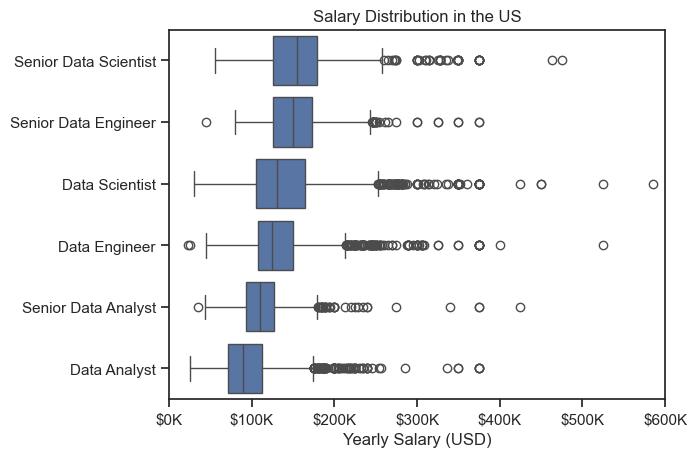

In [10]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.xlim(0,600000)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.title('Salary Distribution in the US')
ax =plt.gca()  
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

Median Salary vs Skill for Data Engineer

In [14]:
df_US_DE = df[(df['job_title_short']=='Data Engineer')&(df['job_country']=='United States')].copy()
df_US_DE = df_US_DE.dropna(subset='salary_year_avg')
df_US_DE = df_US_DE.explode('job_skills')


In [15]:
df_US_DE[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
146,129500.0,golang
146,129500.0,scala
146,129500.0,python


In [31]:
df_US_DE_top_pay = df_US_DE.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)
df_US_DE_top_pay = df_US_DE_top_pay.head(10)
df_US_DE_top_pay

,count,median
job_skills,,
mongo,78,208114.0
vue,1,200000.0
solidity,1,192500.0
node,24,190000.0
ggplot2,2,176250.0
macos,2,172000.0
clojure,2,170866.5
atlassian,18,169860.0
rust,7,165000.0


In [27]:
df_US_DE_top_skills = df_US_DE.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)
df_US_DE_top_skills = df_US_DE_top_skills.sort_values(by='median', ascending=False)
df_US_DE_top_skills

,count,median
job_skills,,
kafka,536,145000.00000
nosql,519,140000.00000
spark,968,137410.15625
java,732,137000.00000
redshift,514,135000.00000
aws,1313,131000.00000
snowflake,765,130700.00000
python,2007,127794.50000
sql,2110,125000.00000


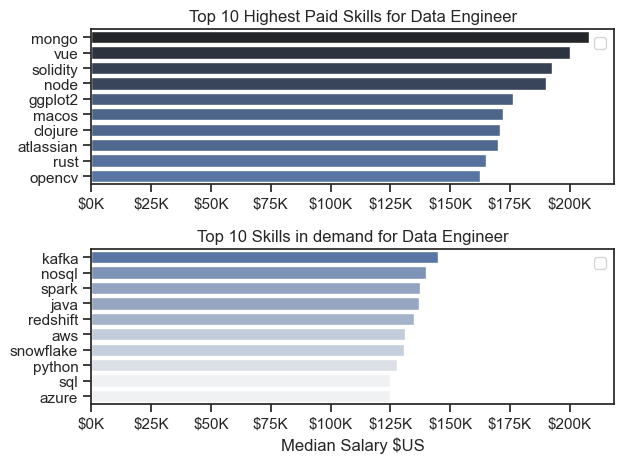

In [32]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

sns.barplot(data=df_US_DE_top_pay, x='median', y=df_US_DE_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_US_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Engineer')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend('')


sns.barplot(data=df_US_DE_top_skills, x='median', y=df_US_DE_top_skills.index, ax=ax[1], hue='median', palette='light:b')
# df_US_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim()) #El limite de la segunda grafica se ajusta al limite que tiene la primera
ax[1].set_title('Top 10 Skills in demand for Data Engineer')
ax[1].set_xlabel('Median Salary $US')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend('')

fig.tight_layout()